## Определение ширины запрещенной зоны ПП . 
Исследование зависимости $\sigma(T)$ с помощью универсального цифрового вольтметра.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
def readData(path): # Функция для считывания данных
    data = pd.read_table(path, sep = '\s+' )
    T_mV = data['TmV']
    Rp_Kom = data['Rp(Kom)']
    Rpp_Kom = data['Rpp(Kom)']
    return(T_mV,Rp_Kom,Rpp_Kom)

In [3]:
# Данные об используемых образцах
# медный проводник 
lp_m = 23.4
dp_m = 0.00007

#  пп
lpp_m = 0.0292
app_m = 0.0041

Sp_m2 = 3.1415*(dp_m**2)/4
Spp_m2 = app_m**2

In [4]:
# считываем данные
Tmv,RpKom,RppKom = readData('/home/dmitry/jupyterNotebook/Dima/LabsMIPT/lab11_1/data')

Rp_Kom = np.array(RpKom)
Rpp_Kom = np.array(RppKom)

# данные темпиратуры нам нужны в градусах
T_deg = np.zeros(len(Tmv))
T_deg[0] = 24+273 # начальные данные из эксперимента
for i in range(1,len(Tmv)):
    diff = Tmv[i]-Tmv[i-1]
    T_deg[i] = diff/0.41*10 + T_deg[i-1]    

In [5]:
# Посчитаем зависимость проводимости от темпиратуры для наших образцов
sigmaP = np.zeros(len(T_deg))
sigmaPP = np.zeros(len(T_deg))

for i in range(len(T_deg)):
    sigmaP[i] = lp_m/(Rp_Kom[i]*Sp_m2)/1000
    sigmaPP[i] = lpp_m/(Rpp_Kom[i]*Spp_m2)/1000    

## Графическое представление полученных результатов

## Медь

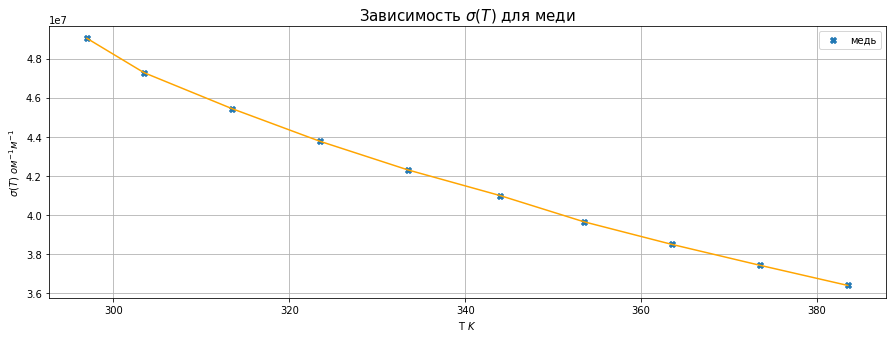

In [19]:
# Визуализация полученных зависимостей
fig = plt.figure(figsize= (15,5)) 
plt.scatter(T_deg, sigmaP, label = 'медь',marker = 'X')
plt.plot(T_deg, sigmaP,color  = 'orange')
plt.title(r'Зависимость $\sigma (T)$ для меди', size=15)
plt.xlabel("T " + "$K$")
plt.ylabel("$\sigma(T)$ "+'$ом^{-1}м^{-1}$')
plt.grid()
plt.legend()

### Определим коэффициент темпиратурного сопротивления меди:
\begin{equation}
\alpha = \frac{1}{R}\frac{dR}{dT}
\end{equation}

$\sigma = \frac{l}{RS} \Rightarrow \frac{d\sigma}{dT} = \frac{-l}{SR^2}\frac{dR}{dT}$

$ \Rightarrow \frac{d\sigma}{dT} = -\sigma \alpha(T)$ 

Тогда в первом приближении:

$ln(\sigma) = -\alpha T$

In [7]:
import math 

a =  0.0034 +- 0.0002 1/K


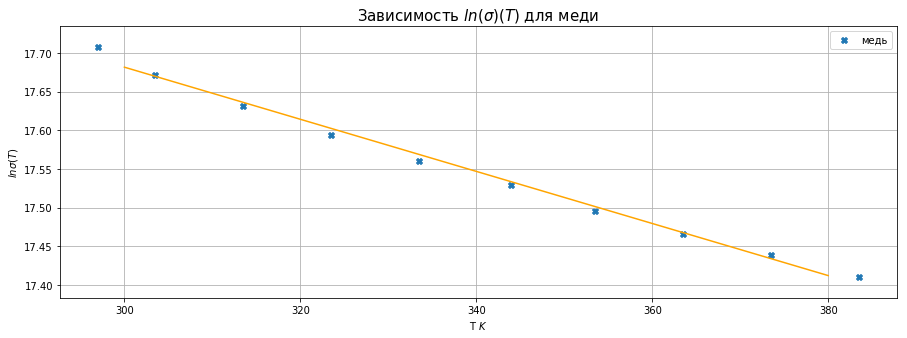

In [21]:
lnSigmaP = np.zeros(len(sigmaP))
for i in range(len(sigmaP)):
    lnSigmaP[i] = math.log(sigmaP[i])

alpha, intercept1, r_value, p_value, std_err = linregress(T_deg, lnSigmaP)    
    
# Визуализация полученных зависимостей
fig = plt.figure(figsize= (15,5)) 
plt.scatter(T_deg, lnSigmaP, label = 'медь',marker = 'X')
plt.plot([300,380],[17.6818,17.4121],color = 'orange')
plt.title(r'Зависимость $ln(\sigma) (T)$ для меди', size=15)
plt.xlabel("T " + "$K$")
plt.ylabel("$ln\sigma(T)$ ")
plt.grid()
plt.legend()    

print("a =  " + str(-alpha.round(4)) + " +- 0.0002 1/K")

Найденный коэффициент темпиратурного сопротивления $\alpha = 3.4 \pm 0.2 \cdot 10^{-3}$ 1/K

Табличное значение $4.3$ 1/K

### Исследуемый полупроводник

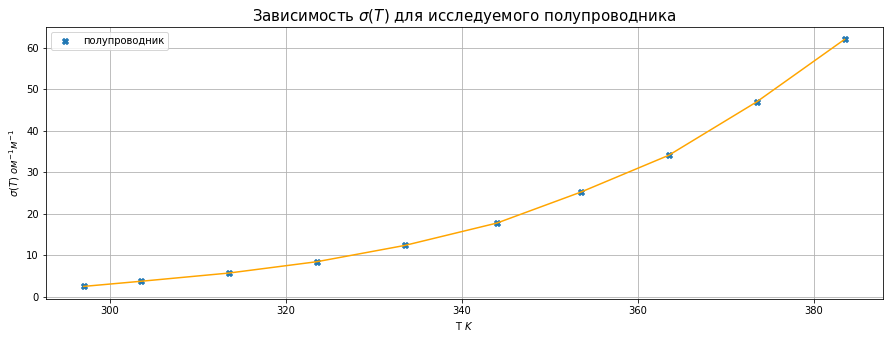

In [22]:
fig = plt.figure(figsize= (15,5)) 
plt.scatter(T_deg, sigmaPP, label = 'полупроводник',marker = 'X')
plt.plot(T_deg, sigmaPP,color = 'orange')
plt.title(r'Зависимость $\sigma (T)$ для иcследуемого полупроводника', size=15)
plt.xlabel("T " + "$K$")
plt.ylabel("$\sigma(T)$ "+'$ом^{-1}м^{-1}$')
plt.grid()
plt.legend()

### Определим ширину запрещенной зоны исследуемого полупроводника:

Для этого построим график зависимости $ln(\sigma) = f(\frac{1}{T})$

h = 0.72  +- 0.01 эВ
8240.059425499221 k


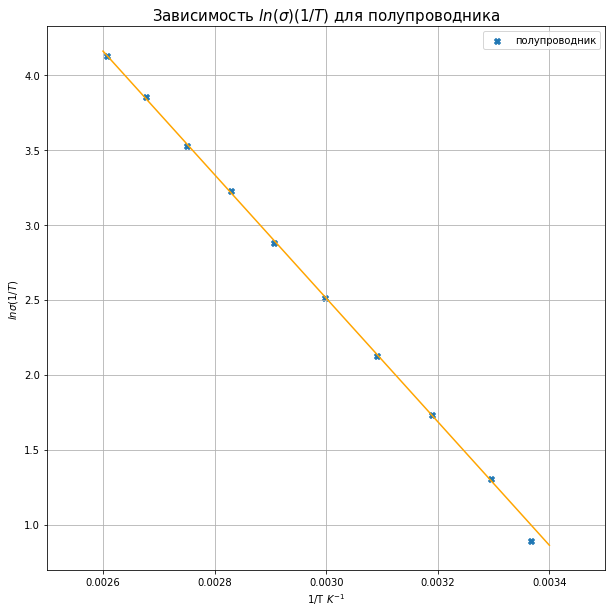

In [24]:
lnSigmaPP = np.zeros(len(sigmaPP))
T_1 = np.zeros(len(T_deg))
for i in range(len(sigmaPP)):
    lnSigmaPP[i] = math.log(sigmaPP[i])
    T_1[i] = 1/T_deg[i]

h, intercept1, r_value, p_value, std_err = linregress(T_1[1:], lnSigmaPP[1:])    
    
# Визуализация полученных зависимостей
fig = plt.figure(figsize= (10,10)) 
plt.scatter(T_1, lnSigmaPP, label = 'полупроводник',marker = 'X')
plt.title(r'Зависимость $ln(\sigma) (1/T)$ для полупроводника', size=15)
plt.xlabel("1/T " + "$K^{-1}$")
plt.xlim(0.00250,0.00350)
plt.plot([0.0026,0.0034],[4.1578,0.8618],color = 'orange')
plt.ylabel("$ln\sigma(1/T)$ ")
plt.grid()
plt.legend()    

print("h = 0.72  +- 0.01 эВ")

print(-h*2,"k")

В ходе данной работы мы исследовали зависимость проводимости меди и неизвестного полупроводника от темпиратуры, нам удалось получить значение коэффициента темпиратурного сопротивления меди. По ширине запрещенной зоны делаем вывод, что полупроводник -  это $Ge$.